# 计算参数曲线的弧长、曲率、Frenet标架

### Method 1: Using `x[t]` and `y[t]`

a b
----------------------------
  2       2    2       2 3/2
(b  Cos[t]  + a  Sin[t] )
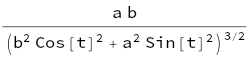

In [18]:
ClearAll["Global`*"]

x[t] = a*Cos[t];
y[t] = b*Sin[t];

x1[t] = D[x[t], t];
y1[t] = D[y[t], t];
x2[t] = D[x1[t], t];
y2[t] = D[y1[t], t];
k[t] = (x1[t]*y2[t] - y1[t]*x2[t])/(x1[t]^2 + y1[t]^2)^(3/2);

Simplify[k[t]]

### Method 2: Using `r[t]`

把上述两个方法封装成函数

说明：

- $a(t)=\dfrac{dr}{ds}=\dfrac{dr}{dt}\cdot\dfrac{dt}{ds}$是单位切向量
- $k(t)=\kappa(t)=\lvert\dfrac{da}{ds}\rvert$是曲率

a b
----------------------------
  2       2    2       2 3/2
(b  Cos[t]  + a  Sin[t] )
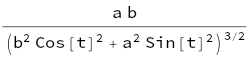

In [44]:
ClearAll["Global`*"]

$Assumptions = {a > 0, b > 0, Element[t, Reals]};
r[t] = {a*Cos[t], b*Sin[t]};

drdt[t] = D[r[t], t]; (* dr/dt *)
dsdt[t] = Sqrt[drdt[t].drdt[t]]; (* ds/dt: *)
drds[t] = drdt[t]/dsdt[t]; (* a = dr/ds *)
dads[t] = D[drds[t], t]/dsdt[t]; (* da/ds *)
k[t] = Sqrt[dads[t].dads[t]]; (* k[t] = norm[da/ds] *)

Simplify[k[t]]

### Method 3: just use `ArcCurvature`

a b
----------------------------
  2       2    2       2 3/2
(b  Cos[t]  + a  Sin[t] )
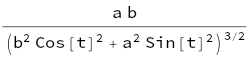

In [48]:
ClearAll["Global`*"]

r[t] = {a*Cos[t], b*Sin[t]};

k[t] = ArcCurvature[r[t], t];

Simplify[k[t]]

## Questions:

#### 2.1

2 a
----------------
        2  2 3/2
(1 + 4 a  t )
         1                2 a t
{-----------------, -----------------}
             2  2               2  2
 Sqrt[1 + 4 a  t ]  Sqrt[1 + 4 a  t ]
        2
    -4 a  t           2 a
{--------------, --------------}
         2  2 2          2  2 2
 (1 + 4 a  t )   (1 + 4 a  t )
      2 a
----------------
        2  2 3/2
(1 + 4 a  t )
-Graphics-
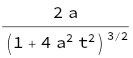
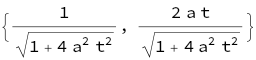
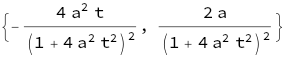
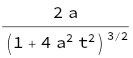
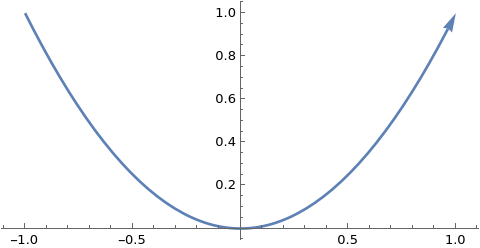

In [136]:
ClearAll["Global`*"]

(* 1 *)
$Assumptions = {a > 0, Element[t, Reals]};

r[t] = {t, a*t^2};

(* trusted result *)
Simplify[ArcCurvature[r[t], t]]

(* steps *)
drdt[t] = D[r[t], t]; (* dr/dt *)
dsdt[t] = Sqrt[drdt[t].drdt[t]]; (* ds/dt: *)
drds[t] = drdt[t]/dsdt[t]; (* a = dr/ds *)
dads[t] = D[drds[t], t]/dsdt[t]; (* da/ds *)
k[t] = Sqrt[dads[t].dads[t]]; (* k[t] = norm[da/ds] *)

(* print results *)
Simplify[drds[t]] (* a = dr/ds *)
Simplify[dads[t]] (* da/ds *)
Simplify[k[t]] (* k[t] = norm[da/ds] *)

Block[{Line = Arrow},
    ParametricPlot[{t, t^2}, {t, -1, 1}]
]

a b
----------------------------
  2       2    2       2 3/2
(b  Cos[t]  + a  Sin[t] )
             a Sin[t]                        b Cos[t]
{-(-----------------------------), -----------------------------}
         2       2    2       2          2       2    2       2
   Sqrt[b  Cos[t]  + a  Sin[t] ]   Sqrt[b  Cos[t]  + a  Sin[t] ]
             2                            2
          a b  Cos[t]                    a  b Sin[t]
{-(--------------------------), -(--------------------------)}
     2       2    2       2 2       2       2    2       2 2
   (b  Cos[t]  + a  Sin[t] )      (b  Cos[t]  + a  Sin[t] )
            a b
----------------------------
  2       2    2       2 3/2
(b  Cos[t]  + a  Sin[t] )
-Graphics-
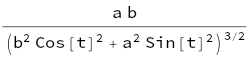
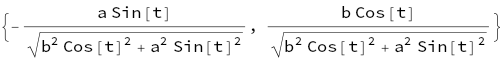
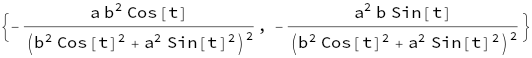
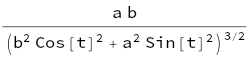
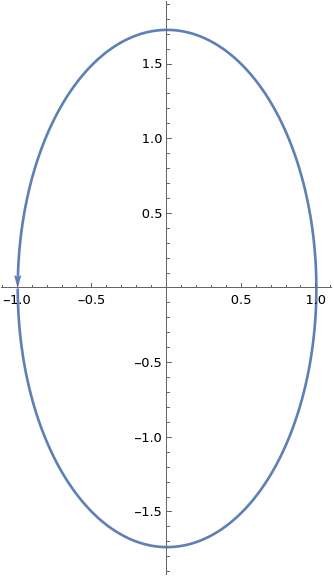

In [103]:
ClearAll["Global`*"]

(* 2 *)
$Assumptions = {a > 0, b > 0, Element[t, Reals]};

r[t] = {a*Cos[t], b*Sin[t]};

(* trusted result *)
Simplify[ArcCurvature[r[t], t]]

(* steps *)
drdt[t] = D[r[t], t]; (* dr/dt *)
dsdt[t] = Sqrt[drdt[t].drdt[t]]; (* ds/dt: *)
drds[t] = drdt[t]/dsdt[t]; (* a = dr/ds *)
dads[t] = D[drds[t], t]/dsdt[t]; (* da/ds *)
k[t] = Sqrt[dads[t].dads[t]]; (* k[t] = norm[da/ds] *)

Simplify[drds[t]] (* a = dr/ds *)
Simplify[dads[t]] (* da/ds *)
Simplify[k[t]] (* k[t] = norm[da/ds] *)

Block[{Line = Arrow},
    ParametricPlot[{Cos[t], Sqrt[3]*Sin[t]}, {t, -Pi, Pi}]
]

a b
------------------------------
  2        2    2        2 3/2
(b  Cosh[t]  + a  Sinh[t] )
            a Sinh[t]                        b Cosh[t]
{-------------------------------, -------------------------------}
       2        2    2        2         2        2    2        2
 Sqrt[b  Cosh[t]  + a  Sinh[t] ]  Sqrt[b  Cosh[t]  + a  Sinh[t] ]
            2                             2
         a b  Cosh[t]                    a  b Sinh[t]
{----------------------------, -(----------------------------)}
   2        2    2        2 2      2        2    2        2 2
 (b  Cosh[t]  + a  Sinh[t] )     (b  Cosh[t]  + a  Sinh[t] )
             a b
------------------------------
  2        2    2        2 3/2
(b  Cosh[t]  + a  Sinh[t] )
-Graphics-
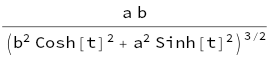
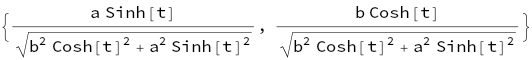
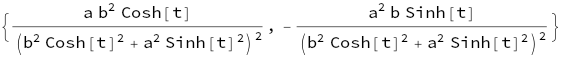
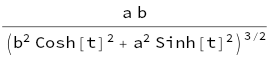
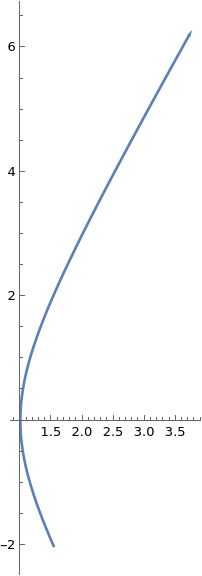

In [154]:
ClearAll["Global`*"]

(* 3 *)
$Assumptions = {a > 0, b > 0, Element[t, Reals]};

(* notice here k[t] shall have a negative sign for rotating counterclock-wise *)
r[t] = {a*Cosh[t],b*Sinh[t]};

(* result *)
Simplify[ArcCurvature[r[t], t]]

(* steps *)
drdt[t] = D[r[t], t]; (* dr/dt *)
dsdt[t] = Sqrt[drdt[t].drdt[t]]; (* ds/dt: *)
drds[t] = drdt[t]/dsdt[t]; (* a = dr/ds *)
dads[t] = D[drds[t], t]/dsdt[t]; (* da/ds *)
k[t] = Sqrt[dads[t].dads[t]]; (* k[t] = norm[da/ds] *)
Simplify[drds[t]] (* a = dr/ds *)
Simplify[dads[t]] (* da/ds *)
Simplify[k[t]] (* k[t] = norm[da/ds] *)

Block[{Line = Arrow},
    ParametricPlot[{Cosh[t],Sqrt[3]*Sinh[t]}, {t, -1, 2}]
]

t 2
Sech[-]
     a
--------
   a
      t        t
{Sech[-], Tanh[-]}
      a        a
        t 2      t         t 3
   Sech[-]  Tanh[-]   Sech[-]
        a        a         a
{-(----------------), --------}
          a              a
     t 2
Sech[-]
     a
--------
   a
-Graphics-
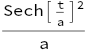
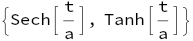
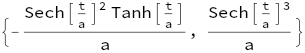
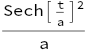
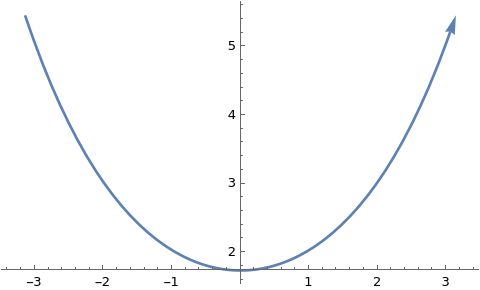

In [169]:
(* 4 *)
r[t] = {t, a*Cosh[t/a]};

$Assumptions = {a > 0, Element[t, Reals]};

(* result *)
Simplify[ArcCurvature[r[t], t]]

(* steps *)
drdt[t] = D[r[t], t]; (* dr/dt *)
dsdt[t] = Sqrt[drdt[t].drdt[t]]; (* ds/dt: *)
drds[t] = drdt[t]/dsdt[t]; (* a = dr/ds *)
dads[t] = D[drds[t], t]/dsdt[t]; (* da/ds *)
k[t] = Sqrt[dads[t].dads[t]]; (* k[t] = norm[da/ds] *)
Simplify[drds[t]] (* a = dr/ds *)
Simplify[dads[t]] (* da/ds *)
Simplify[k[t]] (* k[t] = norm[da/ds] *)

Block[{Line = Arrow},
    ParametricPlot[{t, Sqrt[3]*Cosh[t/Sqrt[3]]}, {t, -Pi, Pi}]
]

#### 2.2

$r(t) = (x(t), y(t))$的曲率算法，已经在上面的代码中给出了。

2
     (y'[t] x''[t] - x'[t] y''[t])
Sqrt[------------------------------]
                 2        2 3
           (x'[t]  + y'[t] )
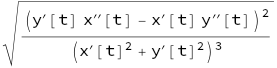

In [194]:
r[t] = {x[t], y[t]};
Simplify[ArcCurvature[r[t], t]]

#### 2.3

极坐标下的曲率算法：

2          2               2
     (f[t]  + 2 f'[t]  - f[t] f''[t])
Sqrt[---------------------------------]
                  2        2 3
             (f[t]  + f'[t] )
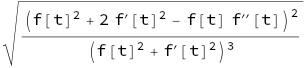

In [183]:
r[t] = {f[t]*Cos[t], f[t]*Sin[t]};
Simplify[ArcCurvature[r[t], t]]

#### 2.4

我们同时计算曲线的挠度，在这里我们队整体这个算法做一步改进，为了计算方便。

前面使用弧长参数的方法主要是便于理解，并让公式更加简洁，实际上计算Frenet标架时，我们只需要计算单位切向量和单位法向量即可，而单位切向量的计算只需要计算一阶导数，而单位法向量的计算只需要计算二阶导数，因此我们可以直接使用参数$t$来计算单位切向量和单位法向量，而不需要使用弧长参数$s$（有时甚至无法给出弧长参数的解析表达式）。

计算方法简要总结如下：

- 计算一阶导数， 二阶导数，三阶导数
- 一阶导数取单位向量，二阶导数取单位向量。分别为单位切向量和单位法向量
- Frenet标架还需要计算单位副法向量，单位副法向量为单位切向量和单位法向量的叉乘
- 给出Frenet标架 $T, N, B$
- 使用如下公式直接给出曲率和挠率

$$
\kappa(t) = \frac {\lvert r^\prime (t) \wedge r^{\prime\prime} (t) \ \rvert} {\lvert r^\prime (t) \rvert^3}
$$
$$
\tau(t) = \frac {r^\prime (t) \cdot (r^{\prime\prime} (t) \wedge r^{\prime\prime\prime} (t))} {\lvert r^\prime (t) \wedge r^{\prime\prime} (t) \ \rvert^2}
$$

2    2
  a Sqrt[a  + b  Cosh[2 t]]          b
{{-------------------------, -----------------}, 
     2    2           3/2     2    2
   (b  + a  Cosh[2 t])       a  + b  Cosh[2 t]
 
             a Sinh[t]                a Cosh[t]                    b
>   {{-----------------------, -----------------------, -----------------------}, 
            2    2                   2    2                   2    2
      Sqrt[b  + a  Cosh[2 t]]  Sqrt[b  + a  Cosh[2 t]]  Sqrt[b  + a  Cosh[2 t]]
 
                       2    2
                     (a  + b ) Cosh[t]
>    {-----------------------------------------------, 
            2    2                  2    2
      Sqrt[b  + a  Cosh[2 t]] Sqrt[a  + b  Cosh[2 t]]
 
                       2    2
                    (-a  + b ) Sinh[t]
>     -----------------------------------------------, 
            2    2                  2    2
      Sqrt[b  + a  Cosh[2 t]] Sqrt[a  + b  Cosh[2 t]]
 
                         a b Sinh[2 t]
>     -(-----------------------------------------------)}, 
              2    2                  2    2
        Sqrt[b  + a  Cosh[2 t]] Sqrt[a  + b  Cosh[2 t]]
 
               b Sinh[t]                 b Cosh[t]                      a
>    {-(-----------------------), -----------------------, -(-----------------------)}}}
              2    2                    2    2                     2    2
        Sqrt[a  + b  Cosh[2 t]]   Sqrt[a  + b  Cosh[2 t]]    Sqrt[a  + b  Cosh[2 t]]
        a Sinh[t]                a Cosh[t]                    b
{-----------------------, -----------------------, -----------------------}
       2    2                   2    2                   2    2
 Sqrt[b  + a  Cosh[2 t]]  Sqrt[b  + a  Cosh[2 t]]  Sqrt[b  + a  Cosh[2 t]]
     Cosh[t]          Sinh[t]
{---------------, ---------------, 0}
 Sqrt[Cosh[2 t]]  Sqrt[Cosh[2 t]]
                  b Sinh[t]                                 b Cosh[t]
{-(---------------------------------------), ---------------------------------------, 
                         2    2                                    2    2
   Sqrt[Cosh[2 t]] Sqrt[b  + a  Cosh[2 t]]   Sqrt[Cosh[2 t]] Sqrt[b  + a  Cosh[2 t]]
 
                         a
>   -(---------------------------------------)}
                            2    2
      Sqrt[Cosh[2 t]] Sqrt[b  + a  Cosh[2 t]]
  a Sqrt[Cosh[2 t]]
----------------------
  2    2           3/2
(b  + a  Cosh[2 t])
b Csch[2 t]
-Graphics3D-
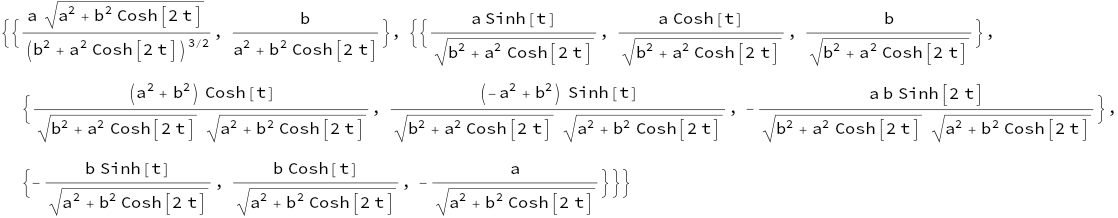
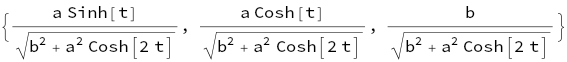
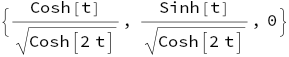
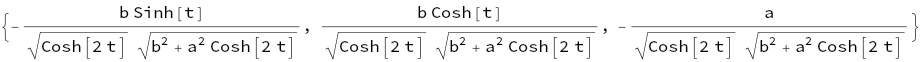
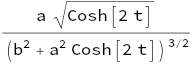
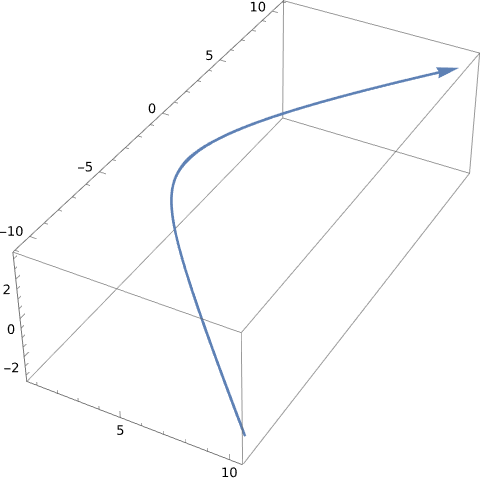

In [280]:
ClearAll["Global`*"]
$Assumptions = {a > 0, b > 0, El
(* 1 *)ement[t, Reals]};

(* 1 *)
r[t] = {a*Cosh[t],a*Sinh[t],b*t};

(* result *)
Simplify[FrenetSerretSystem[r[t], t]]

(* steps *)
r1[t] = D[r[t], t]; (* dr/dt *)
r2[t] = D[r1[t], t]; (* d^2r/dt^2 *)
r3[t] = D[r2[t], t]; (* d^3r/dt^3 *)

(* tangent *)
tangent[t] = r1[t]/Sqrt[r1[t].r1[t]];

(* normal *)
normal[t] = r2[t]/Sqrt[r2[t].r2[t]];

(* binormal *)
binormal[t] = Cross[tangent[t], normal[t]];

(* curvature *)
k[t] = Sqrt[r2[t].r2[t]]/Sqrt[r1[t].r1[t]]^3;

(* torsion *)
torsion[t] = Det[{r1[t], r2[t], r3[t]}]/Sqrt[r1[t].r2[t]]^2;

(* print results *)
Simplify[tangent[t]]
Simplify[normal[t]]
Simplify[binormal[t]]
Simplify[k[t]]
Simplify[torsion[t]]

(* visualize *)
Block[{Line = Arrow},
    ParametricPlot3D[{Cosh[t],Sinh[t],t}, {t, -3, 3}]
]

a
-------
 2    2
a  + b
     a Cos[t]        a Sin[t]           b
{-(-------------), -------------, -------------}
         2    2          2    2         2    2
   Sqrt[a  + b ]   Sqrt[a  + b ]  Sqrt[a  + b ]
 a Sin[t]  a Cos[t]
{--------, --------, 0}
  2    2    2    2
 a  + b    a  + b
   a
-------
 2    2
a  + b
{Sin[t], Cos[t], 0}
     b Cos[t]        b Sin[t]             a
{-(-------------), -------------, -(-------------)}
         2    2          2    2           2    2
   Sqrt[a  + b ]   Sqrt[a  + b ]    Sqrt[a  + b ]
     b
-(-------)
   2    2
  a  + b
-Graphics3D-
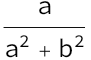
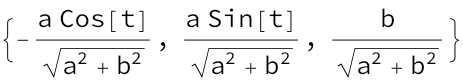
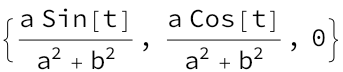
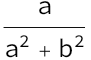
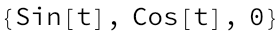
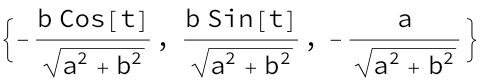
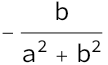
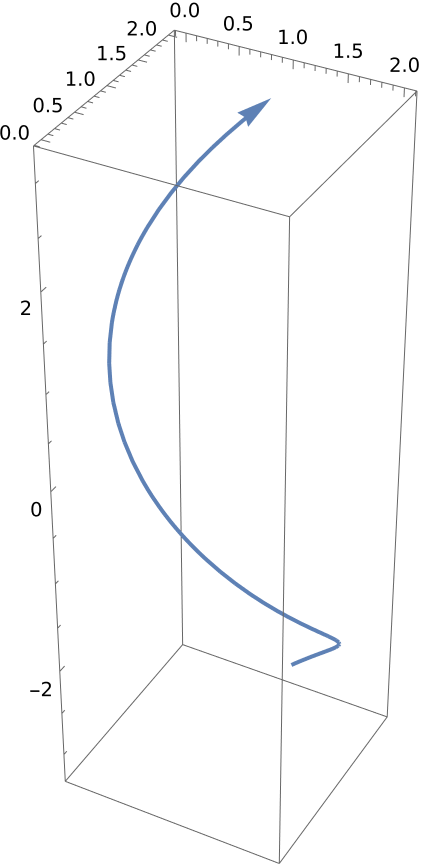

In [311]:
ClearAll["Global`*"]
$Assumptions = {a > 0, b > 0};

(* 3 *)
r[t] = {a*(1-Sin[t]),a*(1-Cos[t]),b*t};

(* result *)
Simplify[ArcCurvature[r[t], t]]

(* steps *)
drdt[t] = D[r[t], t]; (* dr/dt *)
dsdt[t] = Sqrt[drdt[t].drdt[t]]; (* ds/dt: *)
drds[t] = drdt[t]/dsdt[t]; (* a = dr/ds *)
dads[t] = D[drds[t], t]/dsdt[t]; (* da/ds *)
k[t] = Sqrt[dads[t].dads[t]]; (* k[t] = norm[da/ds] *)
n[t] = dads[t]/k[t]; (* n[t] = da/ds / norm[da/ds] *)
b[t] = Cross[drds[t], n[t]]; (* b[t] = dr/ds x n*)
dnds[t] = D[n[t], t]/dsdt[t]; (* dn/ds *)
tao[t] = dnds[t].b[t]; (* tao[t] = dn/ds . b[t] *)


Simplify[drds[t]] (* a = dr/ds *)
Simplify[dads[t]] (* da/ds *)
Simplify[k[t]] (* k[t] = norm[da/ds] *)
Simplify[n[t]] (* n[t] = da/ds / norm[da/ds] *)
Simplify[b[t]] (* b[t] = dr/ds x da/ds *)
Simplify[tao[t]] (* tao[t] = dn/ds . b[t] *)

(* visualize *)
Block[{Line = Arrow},
    ParametricPlot3D[{1-Sin[t],1-Cos[t],t}, {t, -3, 3}]
]

#### 2.6

3/2         3/2
 (1 + t)     (1 - t)        t
{----------, ----------, -------}
     3           3       Sqrt[2]
       1
----------------
              2
2 Sqrt[2 - 2 t ]
 Sqrt[1 + t]    1                  1
{-----------, -(-) Sqrt[1 - t], -------}
      2         2               Sqrt[2]
       1              1
{-------------, -------------, 0}
 4 Sqrt[1 + t]  4 Sqrt[1 - t]
       1
----------------
              2
2 Sqrt[2 - 2 t ]
 Sqrt[1 - t]  Sqrt[1 + t]
{-----------, -----------, 0}
   Sqrt[2]      Sqrt[2]
   1               Sqrt[1 - t]     1
{-(-) Sqrt[1 + t], -----------, -------}
   2                    2       Sqrt[2]
       1
----------------
              2
2 Sqrt[2 - 2 t ]
-Graphics3D-
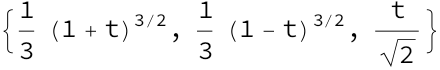
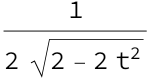
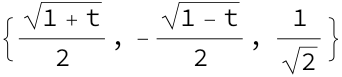
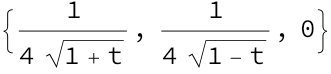
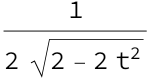
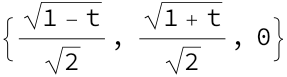
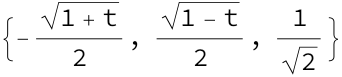
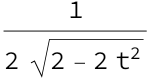
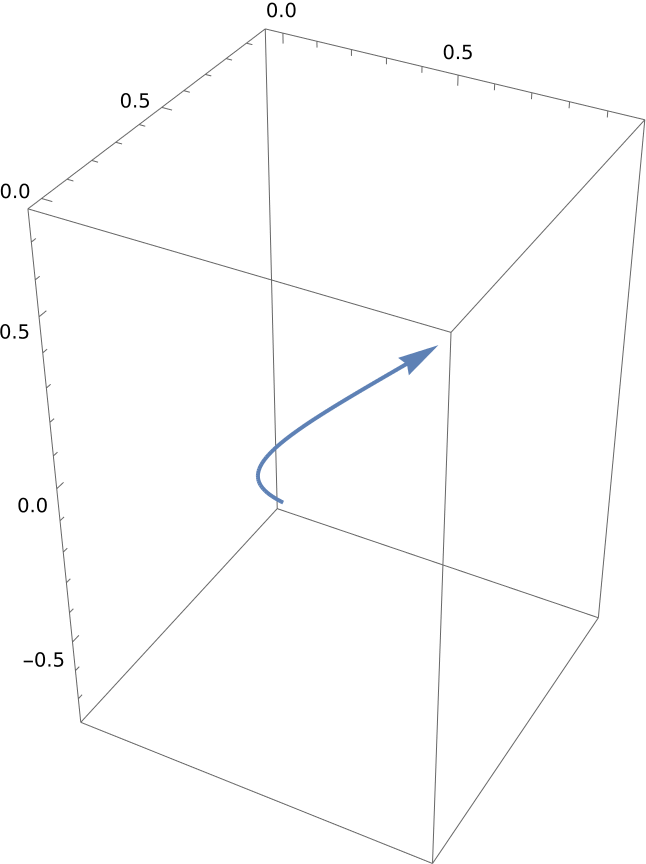

In [448]:
ClearAll["Global`*"]
$Assumptions = {t>-1 && t<1};

r[t] = {(1+t)^(3/2)/3,(1-t)^(3/2)/3,t/Sqrt[2]}

(* result *)
Simplify[ArcCurvature[r[t], t]]

(* steps *)
drdt[t] = D[r[t], t]; (* dr/dt *)
dsdt[t] = Sqrt[drdt[t].drdt[t]]; (* ds/dt: *)
drds[t] = drdt[t]/dsdt[t]; (* a = dr/ds *)
dads[t] = D[drds[t], t]/dsdt[t]; (* da/ds *)
k[t] = Sqrt[dads[t].dads[t]]; (* k[t] = norm[da/ds] *)
n[t] = dads[t]/k[t]; (* n[t] = da/ds / norm[da/ds] *)
b[t] = Cross[drds[t], n[t]]; (* b[t] = dr/ds x n*)
dnds[t] = D[n[t], t]/dsdt[t]; (* dn/ds *)
tao[t] = dnds[t].b[t]; (* tao[t] = dn/ds . b[t] *)


Simplify[drds[t]] (* a = dr/ds *)
Simplify[dads[t]] (* da/ds *)
Simplify[k[t]] (* k[t] = norm[da/ds] *)
Simplify[n[t]] (* n[t] = da/ds / norm[da/ds] *)
Simplify[b[t]] (* b[t] = dr/ds x da/ds *)
Simplify[tao[t]] (* tao[t] = dn/ds . b[t] *)

(* visualize *)
Block[{Line = Arrow},
    ParametricPlot3D[{(1+t)^(3/2)/3,(1-t)^(3/2)/3,t/Sqrt[2]}, {t,-1,1}]
]

#### 2.7

Limit::alimv: Warning: Assumptions that involve the limit variable are ignored.

3                2
  -2 t  RealAbs[2 - 3 t ]                 -2                    1
{{-----------------------, 0}, {{---------------------, ------------------, 0}, 
     -2                            -2                               4
    t      4      6 3/2           t          4      6   Sqrt[1 + --------]
   E    (----- + t )             E    Sqrt[----- + t ]               2
             2                                 2                  2/t   6
          2/t                               2/t                  E     t
         E                                 E
 
                           2                                      2
                    2 - 3 t                                4 - 6 t
>    {------------------------------------, ---------------------------------------, 0}, 
                  4                     2     -2
      Sqrt[1 + --------] RealAbs[2 - 3 t ]   t          4      6                 2
                   2                        E    Sqrt[----- + t ] RealAbs[2 - 3 t ]
                2/t   6                                   2
               E     t                                 2/t
                                                      E
 
>    {0, 0, Piecewise[{{-1, Sqrt[6] + 3 t >= 0}}, 1]}}}
{{0, 0}, {{0, 1, 0}, {1, 0, 0}, {0, 0, -1}}}
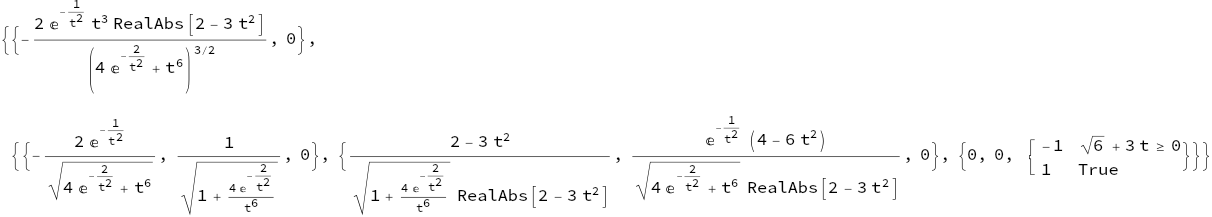

In [317]:
Clear["Global`*"]

$Assumptions = {t < 0, Element[t, Reals]};

k[t] = Simplify[FrenetSerretSystem[{Exp[-1/(t^2)],t,0},t]]

(* limit t-> 0, k[t]? *)
Limit[k[t], t -> 0]

#### 2.13

a
-------
 2    2
a  + s
                               2
                              s
             a (-1 + Sqrt[1 + --])
                               2                 2
                              a                 s
{2 a ArcTanh[---------------------], a Sqrt[1 + --]}
                       s                         2
                                                a
          2
         a
Sqrt[----------]
       2    2 2
     (a  + s )
          s         2    2
{a ArcSin[-], Sqrt[a  + s ]}
          a
       5      3  2      4 2
     (a  - 2 a  s  - a s )
Sqrt[----------------------]
        4      2  2    4 3
      (a  + 2 a  s  - s )
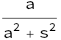
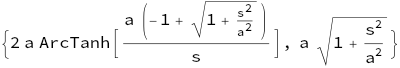
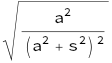
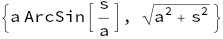
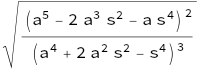

In [40]:
Clear["Global`*"]

k[s] = a/(a^2 + s^2)
(* k[s] = 1/Sqrt[a^2 - s^2] *)
C0 = 0;
C1 = 0;
C2 = 0;
r[s] = {Integrate[Cos[Integrate[k[s], s] + C0], s] + C1, Integrate[Sin[Integrate[k[s], s] + C0], s] + C2};
Simplify[r[s]]
Simplify[ArcCurvature[r[s], s]]



Clear["Global`*"]
r[s] = {a*ArcSin[s/a], Sqrt[a^2+s^2]}
Simplify[ArcCurvature[r[s], s]]

#### 2.20

Sqrt[-8 Sqrt[3] Cos[t] + (4 + Sqrt[3]) (5 + 3 Cos[2 t])]
{{-----------------------------------------------------------, 
                                            2           2 3/2
  (7 + 2 Sqrt[3] - 2 Sqrt[3] Cos[t] + Cos[t]  + 4 Sin[t] )
 
                      2 (1 + Sqrt[3])
>    -------------------------------------------------}, 
     8 Sqrt[3] Cos[t] - (4 + Sqrt[3]) (5 + 3 Cos[2 t])
 
                              1 + Sqrt[3]
>   {{------------------------------------------------------------, 
                                                    2           2
      Sqrt[7 + 2 Sqrt[3] - 2 Sqrt[3] Cos[t] + Cos[t]  + 4 Sin[t] ]
 
                               -2 Sin[t]
>     ------------------------------------------------------------, 
                                                    2           2
      Sqrt[7 + 2 Sqrt[3] - 2 Sqrt[3] Cos[t] + Cos[t]  + 4 Sin[t] ]
 
                            Sqrt[3] - Cos[t]
>     ------------------------------------------------------------}, 
                                                    2           2
      Sqrt[7 + 2 Sqrt[3] - 2 Sqrt[3] Cos[t] + Cos[t]  + 4 Sin[t] ]
 
>    {-((Sqrt[2] (3 + Sqrt[3] + 3 (1 + Sqrt[3]) Cos[t]) Sin[t]) / 
 
>        (Sqrt[19 + 4 Sqrt[3] - 4 Sqrt[3] Cos[t] - 3 Cos[2 t]] 
 
>          Sqrt[-8 Sqrt[3] Cos[t] + (4 + Sqrt[3]) (5 + 3 Cos[2 t])])), 
 
>     (Sqrt[2] (-4 (4 + Sqrt[3]) Cos[t] + Sqrt[3] (3 + Cos[2 t]))) / 
 
>      (Sqrt[19 + 4 Sqrt[3] - 4 Sqrt[3] Cos[t] - 3 Cos[2 t]] 
 
>        Sqrt[-8 Sqrt[3] Cos[t] + (4 + Sqrt[3]) (5 + 3 Cos[2 t])]), 
 
>     (2 Sqrt[2] (4 + Sqrt[3] - 2 Sqrt[3] Cos[t]) Sin[t]) / 
 
>      (Sqrt[19 + 4 Sqrt[3] - 4 Sqrt[3] Cos[t] - 3 Cos[2 t]] 
 
>        Sqrt[-8 Sqrt[3] Cos[t] + (4 + Sqrt[3]) (5 + 3 Cos[2 t])])}, 
 
                       -2 + 2 Sqrt[3] Cos[t]
>    {--------------------------------------------------------, 
      Sqrt[-8 Sqrt[3] Cos[t] + (4 + Sqrt[3]) (5 + 3 Cos[2 t])]
 
                          (1 + Sqrt[3]) Sin[t]
>     -(--------------------------------------------------------), 
        Sqrt[-8 Sqrt[3] Cos[t] + (4 + Sqrt[3]) (5 + 3 Cos[2 t])]
 
                      -2 (1 + Sqrt[3]) Cos[t]
>     --------------------------------------------------------}}}
      Sqrt[-8 Sqrt[3] Cos[t] + (4 + Sqrt[3]) (5 + 3 Cos[2 t])]
                    t         t
                Sin[-]    Cos[-]
  1    1            2         2         1             t        t
{{-, -(-)}, {{-(-------), -------, -(-------)}, {-Cos[-], -Sin[-], 0}, 
  4    4        Sqrt[2]   Sqrt[2]    Sqrt[2]          2        2
 
            t         t
        Sin[-]    Cos[-]
            2         2       1
>    {-(-------), -------, -------}}}
        Sqrt[2]   Sqrt[2]  Sqrt[2]
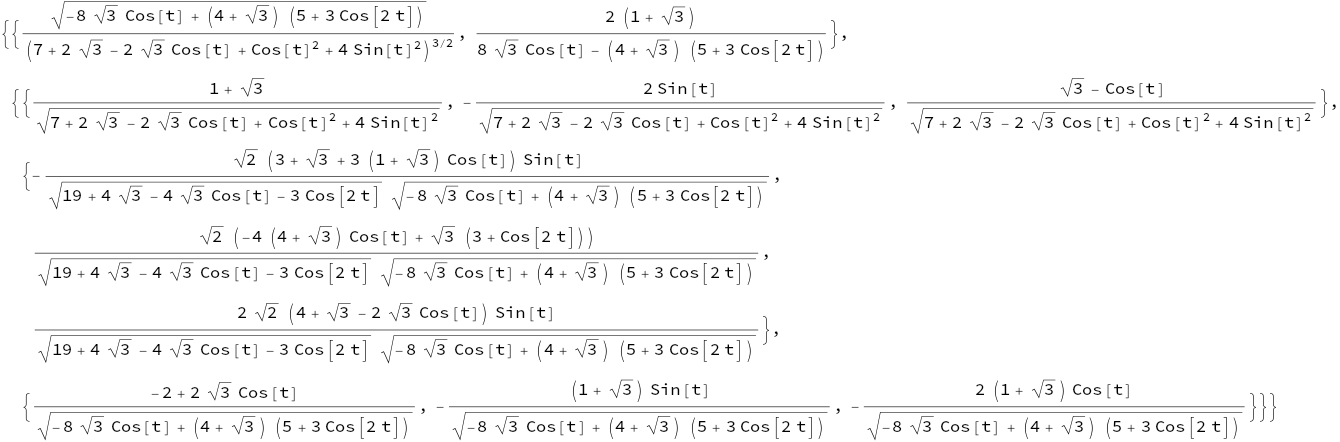
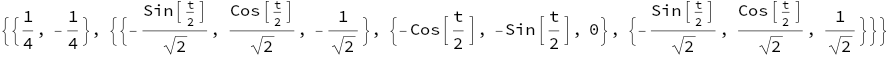

In [73]:
r1[t] = {t+Sqrt[3]*t,2*Cos[t],Sqrt[3]*t-Sin[t]};
r2[t] = {2*Cos[t/2], 2*Sin[t/2], -t};

Simplify[FrenetSerretSystem[r1[t], t]]
Simplify[FrenetSerretSystem[r2[t], t]]

(* plot these two curves
Block[{Line = Arrow},
    ParametricPlot3D[{t+Sqrt[3]*t,2*Cos[t],Sqrt[3]*t-Sin[t]}, {t, -Pi, Pi}]
]
Block[{Line = Arrow},
    ParametricPlot3D[{t, 2*Cos[t/2], 2*Sin[t/2]}, {t, -Pi, Pi}]
] *)